In [21]:
#create goes data
from goes2go import GOES
import xarray as xr
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')


def get_start_end_time(fname):
    #goes filenames structure https://geonetcast.wordpress.com/2017/04/27/goes-16-file-naming-convention/
    #use filename to find start/end times for data
    tem = str(fname).split('/')
    tem2,i = tem[5],25
    dt_start = datetime.strptime(tem2[i:i+13], '%Y%j%H%M%S')
    tem2,i = tem[5],41
    dt_end = datetime.strptime(tem2[i:i+13], '%Y%j%H%M%S')
    return dt_start,dt_end

now = datetime.now()
end_time = now.strftime("%Y-%m-%d %H:%M")
yesterday = now - timedelta(hours=24)
start_time = yesterday.strftime("%Y-%m-%d %H:%M")


for incr in range(6,9):

    date_start = datetime(2023, 12, 6) + timedelta(days=incr)
    date_end = date_start + timedelta(days=1)  #datetime(2023, 12, 13)
    start_time = date_start.strftime("%Y%m%d")
    end_time = date_end.strftime("%Y%m%d")
    
    print(start_time,end_time)
    
    # Open the GOES-R image
    G = GOES(satellite=16, product="ABI-L2-MCMIPC", domain='C')  #ABI-L2-DMWVC ABI-L2-DMWC not at all points #
    # Produce a pandas DataFrame of the available files in a time range
    df = G.df(start=start_time, end=end_time)
    print(df.file[0])
    # Save DataFrame to a CSV file
    files_fname = './../goes_filenames_test_'+start_time+'-'+end_time+'.csv'
    df.to_csv(files_fname)



20231212 20231213
noaa-goes16/ABI-L2-MCMIPC/2023/346/00/OR_ABI-L2-MCMIPC-M6_G16_s20233460001170_e20233460003549_c20233460004061.nc
20231213 20231214
noaa-goes16/ABI-L2-MCMIPC/2023/347/00/OR_ABI-L2-MCMIPC-M6_G16_s20233470001171_e20233470003555_c20233470004076.nc
20231214 20231215
noaa-goes16/ABI-L2-MCMIPC/2023/348/00/OR_ABI-L2-MCMIPC-M6_G16_s20233480001171_e20233480003555_c20233480004079.nc


In [ ]:
mylist = []
for i in range(0,len(df)):
    fname=df.file[i]
    stime,etime = get_start_end_time(fname)
    mylist.append(stime)
mylist = pd.DatetimeIndex(mylist)

# Define coordinates
points_index = np.arange(0,8)  # Example index values (0 to 9)
step_index = np.arange(0,20)  # Example step values
time = mylist #pd.date_range('2024-01-01', periods=288, freq='M')  # Example time values (10 hourly timestamps)

# Define variables
CMI_C10 = np.random.rand(len(time), len(points_index), len(step_index) )  # Example data for variable 'cmi'
CMI_C10 = CMI_C10/CMI_C10*np.nan

# Create xarray.Dataset
save_data = xr.Dataset(
    {
        'CMI_C10': (['time', 'points_index','step'], CMI_C10)
    },
    coords={
        'time': time,
        'points_index': points_index,
        'step': step_index,
    }
)
#save_data.to_netcdf(".\..\..\goes_timeseries.nc")

In [11]:
# test output
import xarray as xr
import matplotlib.pyplot as plt
 
ds = xr.open_dataset(".\..\goes_timeseries_20231206-20231207.nc")
ds


<xarray.Dataset> Size: 178kB
Dimensions:  (time: 287, step: 19, points_index: 8)
Coordinates:
    t        (time) datetime64[ns] 2kB ...
    y        (step, points_index) float32 608B ...
    x        (step, points_index) float32 608B ...
    y_image  float32 4B ...
    x_image  float32 4B ...
Dimensions without coordinates: time, step, points_index
Data variables:
    CMI_C10  (time, step, points_index) float32 174kB ...

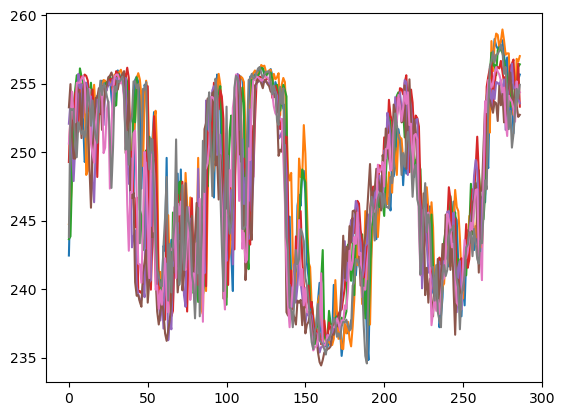

In [19]:
plt.plot(ds.time,ds.CMI_C10[:,3,:].data)

Button(description='Click me!', style=ButtonStyle())